# Final Project - Jabodetabek Housing Analysis

*   Name  : Muhammad Ilham
*   Program : DQLab Bootcamp Data Analyst with SQL & Python using Google Platform – Batch 19


Inisiasi library dan dataset

In [1]:
#Import library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading dataset
df = pd.read_excel('https://github.com/ilham-muhammad/jabodetabek-housing-price/raw/refs/heads/main/rumah123%20jabodetabek%20page%201-530.xlsx', engine='openpyxl')
df.sample()

,ui-molecules-carousel__item src,ui-molecules-carousel__item src 2,ui-atomic-link__icon href,attribute-text,ui-atomic-link__icon href 2,attribute-text 2,ui-atomic-link__icon href 3,attribute-text 3,attribute-info,attribute-info 2,...,ui-atomic-text 3,ui-atomic-text 4,ui-atomic-link href,ui-atomic-text 5,quick-label-badge href,quick-label-badge,quick-label-badge href 2,quick-label-badge 2,quick-label-badge href 3,quick-label-badge 3
2148,https://picture.rumah123.com/r123-images/720x4...,https://picture.rumah123.com/r123-images/720x4...,[object Object],4,[object Object],3,[object Object],1,LT :,200 m²,...,Aset Bank,Label Aset Bank dipasang pada iklan yang merup...,https://www.rumah123.com/aset-bank/,Lihat Semua Properti Aset Bank,https://www.rumah123.com/jual/rumah/?place%5B%...,Siap Huni,NaN,NaN,NaN,NaN


## Data Understanding

<div>
<img src=image.png width=500>
<div>

Dataset merupakan hasil web scraping, dari hasil preview & telaah hanya beberapa variable yang bermanfaat untuk diolah lebih lanjut.
Variable tersebut antara lain :
- attribute-text : Jumlah kamar tidur
- attribute-text 2 : Jumlah kamar mandi
- attribute-text 3 : Kapasitas garasi (mobil)
- attribute-info 2 : Luas Tanah
- attribute-info 4 : Luas Bangunan
- name : Nama Penjual
- card-featured__middle-section__price : Harga Rumah
- card-featured__middle-section href : Detail URL
- card-featured__middle-section 2 : Lokasi


In [3]:
#Pemahaman data
df_prep = df.loc[:,['attribute-text',
'attribute-text 2',
'attribute-text 3',
'attribute-info 2',
'attribute-info 4',
'name',
'card-featured__middle-section__price',
'card-featured__middle-section href',
'card-featured__middle-section 2']].copy()

df_prep.sample(5)

,attribute-text,attribute-text 2,attribute-text 3,attribute-info 2,attribute-info 4,name,card-featured__middle-section__price,card-featured__middle-section href,card-featured__middle-section 2
6941,3,3,1,122 m²,200 m²,Tommy Alexander,"Rp 4,8 Miliar",https://www.rumah123.com/properti/jakarta-sela...,"Jati Padang, Jakarta Selatan"
5347,7,6,4,440 m²,323 m²,FANDI,Rp 9 Miliar,https://www.rumah123.com/properti/tangerang-li...,"Lippo Karawaci, Tangerang"
6862,5,5,4,630 m²,800 m²,Ferry Frederick Ferdinand,Rp 52 Miliar,https://www.rumah123.com/properti/jakarta-sela...,"Kebayoran Baru, Jakarta Selatan"
8438,3,3,2,208 m²,128 m²,Dewi,"Rp 4,85 Miliar",https://www.rumah123.com/properti/jakarta-utar...,"Kelapa Gading, Jakarta Utara"
6852,2,1,1,73 m²,40 m²,Dita Arvisidiq,Rp 625 Juta,https://www.rumah123.com/properti/bogor-cibubu...,"Cibubur, Bogor"


Dari data diatas dapat dilakukan beberapa analisis:
- Korelasi antara harga rumah dengan beberapa variabelnya seperti lokasi, jumlah ruangan, luasan, dll.
- Pengelompokan jenis rumah berdasarkan variabel tersebut
- Rekomendasi segment pembeli berdasarkan kemampuan beli / cicil

## Data Preparation

In [4]:
#Rename nama kolom
df_prep.rename(columns={'attribute-text' : 'kamar_tidur',
          'attribute-text 2' : 'kamar_mandi',
          'attribute-text 3' : 'garasi',
          'attribute-info 2' : 'luas_tanah',
          'attribute-info 4' : 'luas_bangunan',
          'name' : 'penjual',
          'card-featured__middle-section__price' : 'harga',
          'card-featured__middle-section href' : 'url',
          'card-featured__middle-section 2' : 'lokasi'}, inplace=True)

df_prep.iloc[10:11,:]

,kamar_tidur,kamar_mandi,garasi,luas_tanah,luas_bangunan,penjual,harga,url,lokasi
10,3,3,1,120 m²,140 m²,Primary Projects by Rumah123,"Rp 2,8 Miliar",https://www.rumah123.com/properti/bogor-cibubu...,"Cibubur, Bogor"


In [5]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10616 entries, 0 to 10615
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   kamar_tidur    10524 non-null  object
 1   kamar_mandi    10485 non-null  object
 2   garasi         7679 non-null   object
 3   luas_tanah     10616 non-null  object
 4   luas_bangunan  10602 non-null  object
 5   penjual        10616 non-null  object
 6   harga          10540 non-null  object
 7   url            10540 non-null  object
 8   lokasi         10540 non-null  object
dtypes: object(9)
memory usage: 746.6+ KB


- Data yang tidak mencantumkan `harga` tidak dapat digunakan sehingga perlu dihapus


In [6]:
#Drop baris dengan kolom `harga` bernilai == NaN
df_prep.dropna(subset='harga', inplace=True)
df_prep[df_prep['harga'].isna() == True]

,kamar_tidur,kamar_mandi,garasi,luas_tanah,luas_bangunan,penjual,harga,url,lokasi


- Data yang tidak mencantumkan jumlah `kamar_tidur` dan `kamar_mandi` juga tidak dapat digunakan

In [7]:
#Drop baris dengan kolom `kamar_tidur` & 'kamar_mandi' bernilai == NaN
df_prep.dropna(subset=['kamar_tidur','kamar_mandi'], inplace=True)
df_prep[(df_prep['kamar_tidur'].isna() == True) &
       (df_prep['kamar_mandi'].isna() == True)]

,kamar_tidur,kamar_mandi,garasi,luas_tanah,luas_bangunan,penjual,harga,url,lokasi


- `garasi` dengan nilai NaN diasumsikan memiliki kapasitas 1 kendaraan

In [8]:
#Fill kolom `garasi` bernilai == NaN dengan nilai 1
df_prep['garasi'].fillna(value=1, inplace=True)
df_prep[df_prep['garasi'].isna() == True]

C:\Users\Ilham\AppData\Local\Temp\ipykernel_16732\4053845978.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prep['garasi'].fillna(value=1, inplace=True)


,kamar_tidur,kamar_mandi,garasi,luas_tanah,luas_bangunan,penjual,harga,url,lokasi


- Check jika ada nilai non numeric dalam kolom `kamar_tidur`, `kamar_mandi`, `garasi`

In [9]:
#Check jika ada nilai non numeric dalam kolom `kamar_tidur`, `kamar_mandi`, `garasi`
df_prep[(df_prep['kamar_tidur'].str.isnumeric()==False) &
       (df_prep['kamar_mandi'].str.isnumeric()==False) &
       (df_prep['garasi'].str.isnumeric()==False)]
       

,kamar_tidur,kamar_mandi,garasi,luas_tanah,luas_bangunan,penjual,harga,url,lokasi


- check kembali missing value

In [10]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10409 entries, 2 to 10615
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   kamar_tidur    10409 non-null  object
 1   kamar_mandi    10409 non-null  object
 2   garasi         10409 non-null  object
 3   luas_tanah     10409 non-null  object
 4   luas_bangunan  10407 non-null  object
 5   penjual        10409 non-null  object
 6   harga          10409 non-null  object
 7   url            10409 non-null  object
 8   lokasi         10409 non-null  object
dtypes: object(9)
memory usage: 813.2+ KB


In [11]:
df_prep[df_prep['luas_bangunan'].isna()==True]

,kamar_tidur,kamar_mandi,garasi,luas_tanah,luas_bangunan,penjual,harga,url,lokasi
4832,5,4,2,400 m²,NaN,Nur Syam,"Rp 3,7 Miliar",https://www.rumah123.com/properti/jakarta-timu...,"Pondok Kelapa, Jakarta Timur"
7759,7,3,1,120 m²,NaN,Yessi RWKG,"Rp 2,5 Miliar",https://www.rumah123.com/properti/jakarta-utar...,"Kelapa Gading, Jakarta Utara"


In [12]:
#Isi kolom 'luas_bangunan' yang kosong disamakan dengan 'luas_tanah'
df_prep['luas_bangunan'] = df_prep['luas_bangunan'].fillna(df_prep['luas_tanah'])

In [13]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10409 entries, 2 to 10615
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   kamar_tidur    10409 non-null  object
 1   kamar_mandi    10409 non-null  object
 2   garasi         10409 non-null  object
 3   luas_tanah     10409 non-null  object
 4   luas_bangunan  10409 non-null  object
 5   penjual        10409 non-null  object
 6   harga          10409 non-null  object
 7   url            10409 non-null  object
 8   lokasi         10409 non-null  object
dtypes: object(9)
memory usage: 813.2+ KB


Sudah tidak ada lagi missing values

## Data Cleaning

Masih terdapat ketidaksesuaian jenis data `Dtype` pada dataset, sehingga perlu disesuaikan

In [14]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10409 entries, 2 to 10615
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   kamar_tidur    10409 non-null  object
 1   kamar_mandi    10409 non-null  object
 2   garasi         10409 non-null  object
 3   luas_tanah     10409 non-null  object
 4   luas_bangunan  10409 non-null  object
 5   penjual        10409 non-null  object
 6   harga          10409 non-null  object
 7   url            10409 non-null  object
 8   lokasi         10409 non-null  object
dtypes: object(9)
memory usage: 813.2+ KB


In [15]:
df_prep.sample()

,kamar_tidur,kamar_mandi,garasi,luas_tanah,luas_bangunan,penjual,harga,url,lokasi
5928,2,2,1,70 m²,70 m²,Verani,Rp 849 Juta,https://www.rumah123.com/properti/tangerang-li...,"Lippo Karawaci, Tangerang"


- Ubah Dtype kolom `kamar_tidur`, `kamar_mandi`, dan `garasi` ke integer

In [16]:
df_prep = df_prep.astype({'kamar_tidur':int,
               'kamar_mandi':int,
               'garasi':int,
               })

df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10409 entries, 2 to 10615
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   kamar_tidur    10409 non-null  int64 
 1   kamar_mandi    10409 non-null  int64 
 2   garasi         10409 non-null  int64 
 3   luas_tanah     10409 non-null  object
 4   luas_bangunan  10409 non-null  object
 5   penjual        10409 non-null  object
 6   harga          10409 non-null  object
 7   url            10409 non-null  object
 8   lokasi         10409 non-null  object
dtypes: int64(3), object(6)
memory usage: 813.2+ KB


- Split dan Ubah Dtype kolom `luas_tanah` dan `luas_bangunan` ke float

In [17]:
df_prep['luas_tanah'] = df_prep['luas_tanah'].str.replace(',','.').str.split(' ').str[0].astype(float)
df_prep['luas_bangunan'] = df_prep['luas_bangunan'].str.replace(',','.').str.split(' ').str[0].astype(float)
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10409 entries, 2 to 10615
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   kamar_tidur    10409 non-null  int64  
 1   kamar_mandi    10409 non-null  int64  
 2   garasi         10409 non-null  int64  
 3   luas_tanah     10409 non-null  float64
 4   luas_bangunan  10409 non-null  float64
 5   penjual        10409 non-null  object 
 6   harga          10409 non-null  object 
 7   url            10409 non-null  object 
 8   lokasi         10409 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 813.2+ KB


- Split dan ubah Dtype kolom `harga` ke float

In [18]:
df_prep['harga_nilai'] = df_prep['harga'].str.replace(',','.').str.split(' ').str[-2].astype(float)
df_prep['satuan'] = df_prep['harga'].str.replace(',','.').str.split(' ').str[-1]
df_prep['harga_satuan'] = df_prep['satuan'].map({'Juta':1_000_000,
                                                        'Miliar': 1_000_000_000})

df_prep['harga'] = df_prep['harga_nilai']*df_prep['harga_satuan']
df_prep['harga'] = df_prep['harga'].apply(lambda x: x/1_000_000*1_000_000_000 if x<10_000_000 else x)

- Split kolom `lokasi` ke kolom baru `lokasi_kawasan` dan `lokasi_kota`

In [19]:
df_prep[['lokasi_kawasan', 'lokasi_kota']] = df_prep['lokasi'].str.split(',', expand=True)
df_prep.loc[10:11,:]

,kamar_tidur,kamar_mandi,garasi,luas_tanah,luas_bangunan,penjual,harga,url,lokasi,harga_nilai,satuan,harga_satuan,lokasi_kawasan,lokasi_kota
10,3,3,1,120.0,140.0,Primary Projects by Rumah123,2.800000e+09,https://www.rumah123.com/properti/bogor-cibubu...,"Cibubur, Bogor",2.8,Miliar,1000000000,Cibubur,Bogor


In [20]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10409 entries, 2 to 10615
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   kamar_tidur     10409 non-null  int64  
 1   kamar_mandi     10409 non-null  int64  
 2   garasi          10409 non-null  int64  
 3   luas_tanah      10409 non-null  float64
 4   luas_bangunan   10409 non-null  float64
 5   penjual         10409 non-null  object 
 6   harga           10409 non-null  float64
 7   url             10409 non-null  object 
 8   lokasi          10409 non-null  object 
 9   harga_nilai     10409 non-null  float64
 10  satuan          10409 non-null  object 
 11  harga_satuan    10409 non-null  int64  
 12  lokasi_kawasan  10409 non-null  object 
 13  lokasi_kota     10409 non-null  object 
dtypes: float64(4), int64(4), object(6)
memory usage: 1.4+ MB


## Exploratory Data Analysis

In [21]:
#Ambil kolom penting yang dapat dianalisis
df_eda = df_prep.copy()
df_eda.drop(['penjual', 'url', 'harga_nilai', 'harga_satuan'], axis=1, inplace=True)
df_eda.sample()

,kamar_tidur,kamar_mandi,garasi,luas_tanah,luas_bangunan,harga,lokasi,satuan,lokasi_kawasan,lokasi_kota
8297,5,3,2,135.0,100.0,2.100000e+09,"Suvarna Sutera, Tangerang",Miliar,Suvarna Sutera,Tangerang


In [22]:
#Deskriptif analisis
df_eda.describe()

,kamar_tidur,kamar_mandi,garasi,luas_tanah,luas_bangunan,harga
count,10409.000000,10409.000000,10409.000000,10409.000000,10409.000000,1.040900e+04
mean,3.723797,3.023153,1.662696,237.260832,239.353924,6.509503e+09
std,3.220815,3.072676,1.339287,370.701374,256.829710,1.236294e+10
min,1.000000,1.000000,1.000000,15.000000,1.000000,3.100000e+07
25%,3.000000,2.000000,1.000000,84.000000,89.000000,1.300000e+09
50%,3.000000,3.000000,1.000000,135.000000,159.000000,2.700000e+09
75%,4.000000,4.000000,2.000000,250.000000,300.000000,6.250000e+09
max,248.000000,237.000000,30.000000,10742.000000,5250.000000,2.500000e+11


Terdapat rumah dengan `luas_bangunan` 1m2, maka diasumsikan luasnya sama dengan `luas_tanah`

In [23]:
#Perbaiki luas bangunan anomali
df_eda['luas_bangunan'] = df_eda['luas_bangunan'].where(df_eda['luas_bangunan']>df_eda['luas_tanah']/10, other=df_eda['luas_tanah'])

- Deteksi outlier

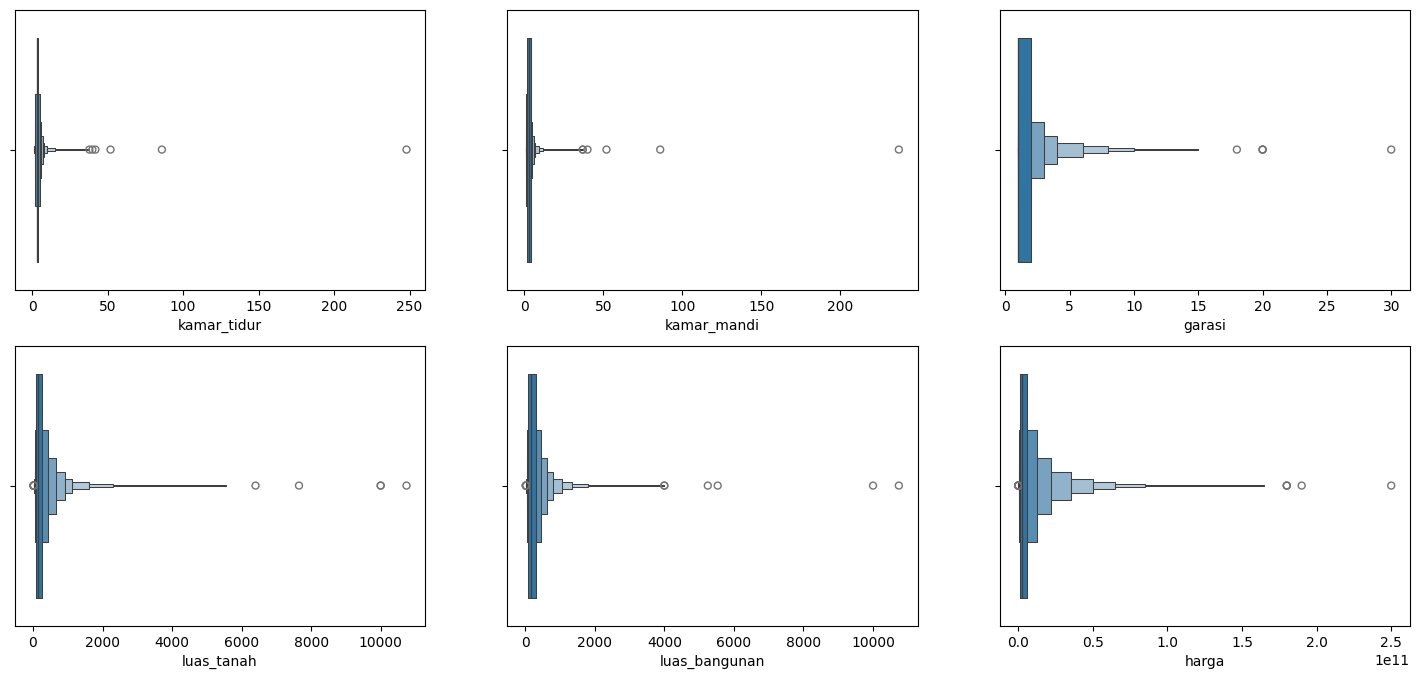

In [24]:
#Seleksi kolom numerical
numerical_col = [x for x in df_eda.columns if df_eda[x].dtype !='object']

#Plot
fig, axes = plt.subplots(nrows=2, ncols=3
                         ,figsize=(18,8))

for i,col in enumerate(numerical_col):
    sns.boxenplot(data=df_eda, x=col, ax=axes.flatten()[i], orient='x')

# for i,col in enumerate(numerical_col):
#     a = df_eda.boxplot(col, ax=axes.flatten()[i],grid=False)

In [25]:
#Hapus outlier menggunakan interval IQR
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]
    return df

df_eda_clean = remove_outliers_iqr(df_eda, numerical_col)

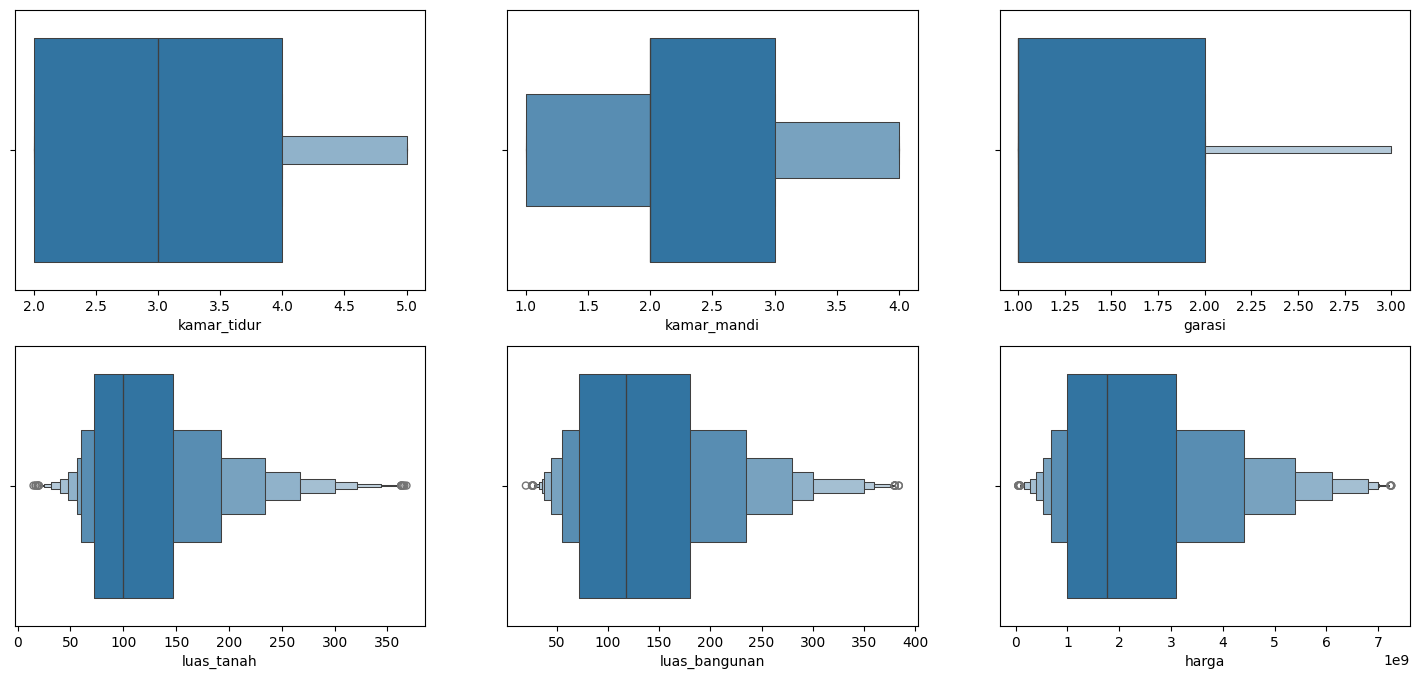

In [26]:
#Plot ulang pasca drop outlier
fig, axes = plt.subplots(nrows=2, ncols=3
                         ,figsize=(18,8))

for i,col in enumerate(numerical_col):
    sns.boxenplot(data=df_eda_clean, x=col, ax=axes.flatten()[i], orient='x')
    

In [27]:
#Perubahan jumlah baris pasca drop outlier
print(df_eda.shape)
print(df_eda_clean.shape)

(10409, 10)
(7178, 10)


- Analisis deskriptif

In [28]:
#Analisis deskriptif pasca drop outlier
df_eda_clean[['harga', 'luas_tanah', 'luas_bangunan']].describe()

,harga,luas_tanah,luas_bangunan
count,7.178000e+03,7178.000000,7178.000000
mean,2.247125e+09,117.779465,133.060463
std,1.613445e+09,60.434505,76.424345
min,4.900000e+07,15.000000,20.000000
25%,9.850000e+08,72.000000,72.000000
50%,1.770000e+09,100.000000,118.000000
75%,3.100000e+09,147.000000,180.000000
max,7.250000e+09,368.000000,384.000000


- Plot distribusi data tiap kolom

Text(0.5, 1.0, 'Histogram Harga - LT - LB')

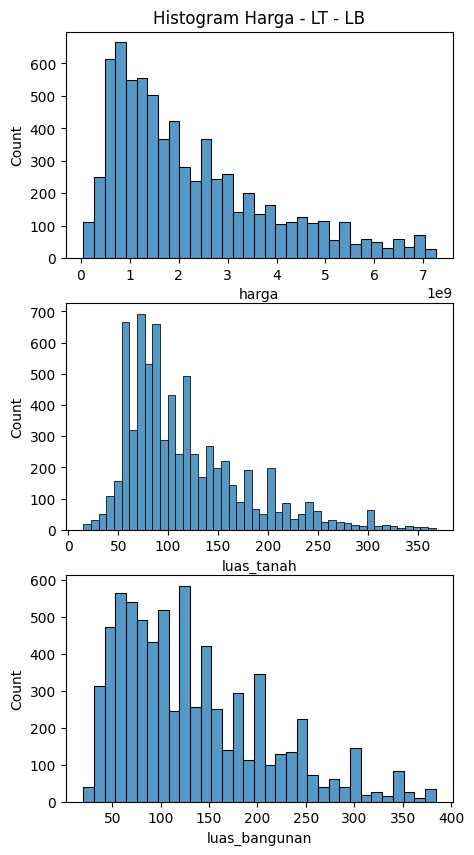

In [29]:
#Plot harga, luas tanah & luas bangunan
fig, axes = plt.subplots(nrows=3, ncols=1
                         ,figsize=(5,10))

for i,col in enumerate(['harga', 'luas_tanah', 'luas_bangunan']):
    sns.histplot(data=df_eda_clean[col], ax=axes.flatten()[i])

axes[0].set_title('Histogram Harga - LT - LB')

Text(0.5, 1.0, 'Histogram Jumlah Kamar Tidur - Kamar Mandi - Garasi')

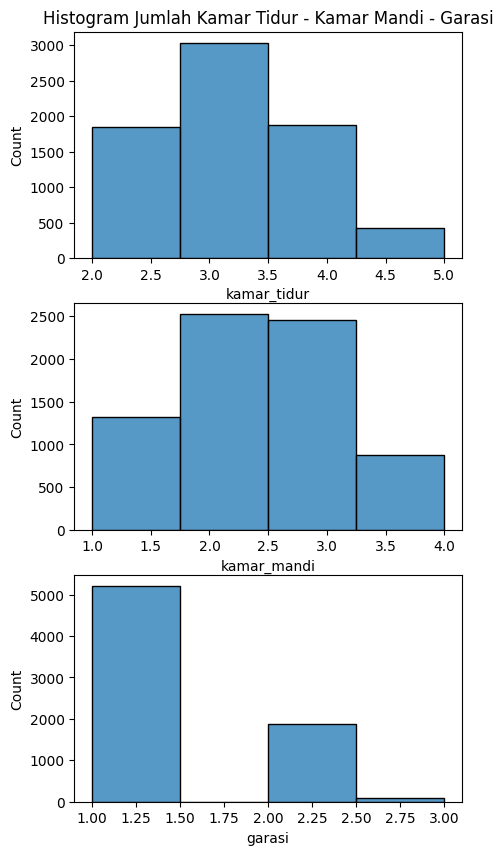

In [30]:
#Plot Jumlah Kamar Tidur - Kamar Mandi - Garasi
fig, axes = plt.subplots(nrows=3, ncols=1
                         ,figsize=(5,10))

for i,col in enumerate(['kamar_tidur', 'kamar_mandi', 'garasi']):
    sns.histplot(data=df_eda_clean[col], ax=axes.flatten()[i], bins=4)

axes[0].set_title('Histogram Jumlah Kamar Tidur - Kamar Mandi - Garasi')

In [31]:
#Cek berapa lokasi
cols = ['lokasi', 'lokasi_kawasan', 'lokasi_kota']

unique_counts = pd.DataFrame({
    'Column': cols,
    'Unique Count': [df_eda_clean[col].nunique() for col in cols]
})

unique_counts

,Column,Unique Count
0,lokasi,559
1,lokasi_kawasan,536
2,lokasi_kota,9


`Lokasi` & `kawasan` bernilai unik terlalu banyak untuk digunakan dalam analisis, maka akan difokuskan ke `kota` saja

In [32]:
# Cek kota
pd.DataFrame({'Kota': df_eda_clean['lokasi_kota'].value_counts()})


,Kota
lokasi_kota,
Tangerang,1538
Bekasi,1096
Jakarta Barat,908
Depok,896
Jakarta Utara,726
Jakarta Selatan,676
Bogor,672
Jakarta Timur,538
Jakarta Pusat,128


In [33]:
#Analisis berdasarkan lokasi `kota`
df_eda_clean.groupby('lokasi_kota').mean(numeric_only=True).sort_values(by='harga', ascending=False)

,kamar_tidur,kamar_mandi,garasi,luas_tanah,luas_bangunan,harga
lokasi_kota,,,,,,
Jakarta Selatan,3.536982,2.875740,1.505917,144.997041,183.659763,3.690203e+09
Jakarta Utara,3.371901,2.808540,1.345730,123.061983,171.619835,3.522729e+09
Jakarta Barat,3.328194,2.746696,1.332599,121.618943,163.854626,2.969405e+09
Jakarta Pusat,3.179688,2.484375,1.218750,99.890625,145.429688,2.697289e+09
Tangerang,3.133290,2.444083,1.289337,121.916775,128.364759,2.291721e+09
Jakarta Timur,3.224907,2.511152,1.384758,117.934944,131.715613,2.115095e+09
Depok,2.843750,2.059152,1.148438,101.948661,100.046875,1.314474e+09
Bekasi,2.896898,2.031022,1.238139,103.601277,101.862226,1.244995e+09
Bogor,2.755952,1.889881,1.154762,117.550595,103.261905,1.237264e+09


In [34]:
df_eda_clean.describe()

,kamar_tidur,kamar_mandi,garasi,luas_tanah,luas_bangunan,harga
count,7178.000000,7178.000000,7178.000000,7178.000000,7178.000000,7.178000e+03
mean,3.120228,2.402619,1.288799,117.779465,133.060463,2.247125e+09
std,0.859281,0.923916,0.483289,60.434505,76.424345,1.613445e+09
min,2.000000,1.000000,1.000000,15.000000,20.000000,4.900000e+07
25%,2.000000,2.000000,1.000000,72.000000,72.000000,9.850000e+08
50%,3.000000,2.000000,1.000000,100.000000,118.000000,1.770000e+09
75%,4.000000,3.000000,2.000000,147.000000,180.000000,3.100000e+09
max,5.000000,4.000000,3.000000,368.000000,384.000000,7.250000e+09


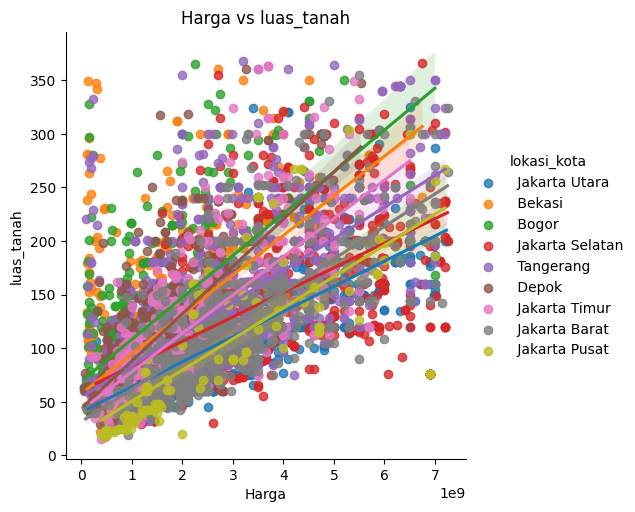

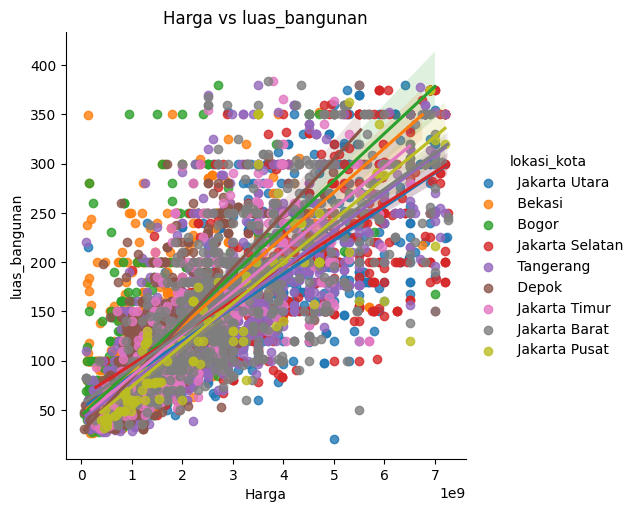

In [35]:
#Scatterplot
for col in ['luas_tanah', 'luas_bangunan']:
    sns.lmplot(data=df_eda_clean, x='harga', y=col, hue='lokasi_kota')
    plt.title(f'Harga vs {col}')
    plt.xlabel('Harga')
    plt.ylabel(col)
    plt.show()

## Machine Learning Modeling

### Clustering menggunakan metode K-Means & PCA

- Menetukan k Optimum dengan elbow method

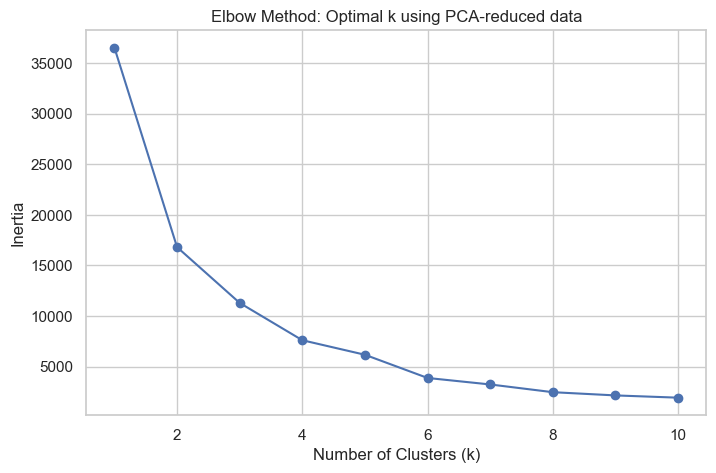

In [66]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 1. Select and encode data
cols = ['kamar_tidur', 'kamar_mandi', 'garasi', 'luas_tanah', 'luas_bangunan', 'harga', 'lokasi_kota']
df_cluster = df_eda_clean[cols].copy()
df_cluster = pd.get_dummies(df_cluster, columns=['lokasi_kota'], drop_first=True)

# 2. Scale features
X_scaled = StandardScaler().fit_transform(df_cluster)

# 3. Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Elbow method to find optimal k
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# 5. Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method: Optimal k using PCA-reduced data')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

- KMeans clustering

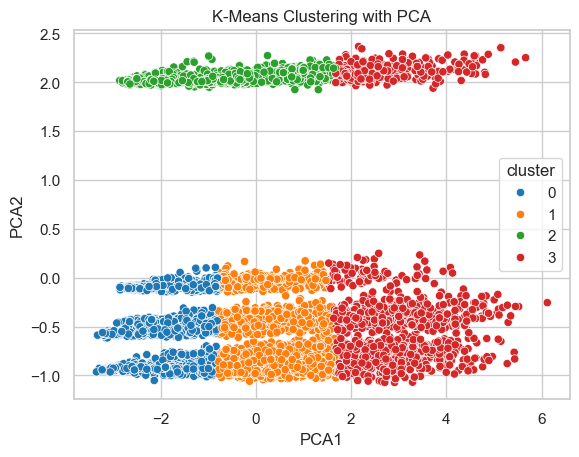

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Select relevant columns
df_cluster = df_eda_clean[cols].copy()

# 2. Encode categorical column
df_cluster = pd.get_dummies(df_cluster, columns=['lokasi_kota'], drop_first=True)

# 3. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)

# 4. Apply PCA (reduce to 2 components for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 5. Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# 6. Add results to DataFrame
df_cluster['cluster'] = clusters
df_cluster['PCA1'] = X_pca[:, 0]
df_cluster['PCA2'] = X_pca[:, 1]

# 7. Visualize clusters
sns.scatterplot(data=df_cluster, x='PCA1', y='PCA2', hue='cluster', palette='tab10')
plt.title('K-Means Clustering with PCA')
plt.show()

- Check hasil cluster

In [69]:
df_cluster.sample(5)

,kamar_tidur,kamar_mandi,garasi,luas_tanah,luas_bangunan,harga,lokasi_kota_ Bogor,lokasi_kota_ Depok,lokasi_kota_ Jakarta Barat,lokasi_kota_ Jakarta Pusat,lokasi_kota_ Jakarta Selatan,lokasi_kota_ Jakarta Timur,lokasi_kota_ Jakarta Utara,lokasi_kota_ Tangerang,cluster,PCA1,PCA2
7193,4,3,2,87.0,130.0,2.450000e+09,False,False,False,False,False,True,False,False,1,0.891006,-0.352112
429,3,3,2,95.0,125.0,1.250000e+09,False,False,False,False,False,False,False,False,1,0.084890,-0.010696
2317,3,3,1,154.0,80.0,9.700000e+08,False,False,False,False,False,False,False,True,2,-0.442550,2.108309
1755,2,1,1,60.0,60.0,4.500000e+08,True,False,False,False,False,False,False,False,0,-2.990090,-0.586186
5949,2,3,2,102.0,102.0,1.300000e+09,False,False,False,False,False,False,False,True,2,-0.463744,2.109792


- Mengecek makna tiap cluster dari nilai centroid

In [70]:
# Extract centroids
centroids = kmeans.cluster_centers_
centroids

# Convert to DataFrame for readability
centroid_df = pd.DataFrame(kmeans.cluster_centers_, columns=['PCA1', 'PCA2'])
print(centroid_df)


       PCA1      PCA2
0 -1.935517 -0.532216
1  0.345514 -0.601816
2 -0.746572  2.044967
3  2.822338 -0.029301


In [71]:
# 1. Get PCA-space centroids
pca_centroids = kmeans.cluster_centers_

# 2. Convert back to scaled feature space
centroids_scaled = pca.inverse_transform(pca_centroids)

# 3. Convert back to original feature space
centroids_original = scaler.inverse_transform(centroids_scaled)

# 4. Create DataFrame with original feature names
centroid_df = pd.DataFrame(centroids_original, columns=df_cluster.columns[:-3])
centroid_df.index.name = 'clusters'
centroid_df


,kamar_tidur,kamar_mandi,garasi,luas_tanah,luas_bangunan,harga,lokasi_kota_ Bogor,lokasi_kota_ Depok,lokasi_kota_ Jakarta Barat,lokasi_kota_ Jakarta Pusat,lokasi_kota_ Jakarta Selatan,lokasi_kota_ Jakarta Timur,lokasi_kota_ Jakarta Utara,lokasi_kota_ Tangerang
clusters,,,,,,,,,,,,,,
0,2.449533,1.675686,1.038476,73.825822,67.717982,8.583212e+08,0.178370,0.257126,0.119200,0.020900,0.021917,0.083956,0.068810,0.025445
1,3.232257,2.528051,1.319839,123.057096,147.039606,2.508257e+09,0.106255,0.164373,0.194017,0.022583,0.129141,0.089612,0.149075,-0.000226
2,2.886390,2.136225,1.236312,109.120540,100.381623,1.668764e+09,0.036650,-0.028120,-0.090149,0.001906,-0.004951,0.025890,-0.047478,0.942942
3,4.089326,3.457610,1.638044,178.903148,231.017002,4.287527e+09,0.002126,0.004912,0.213669,0.019482,0.225047,0.080623,0.197017,0.202741


- Remaping label lokasi

In [ ]:
df_cluster = df_eda_clean[cols].copy()

# 1. Fit encoder on original data
le = LabelEncoder()
df_cluster['lokasi_kota_encoded'] = le.fit_transform(df_cluster['lokasi_kota'])

# 2. Later: inverse transform encoded values
df_cluster['lokasi_kota_original'] = le.inverse_transform(df_cluster['lokasi_kota_encoded'])

mapping_df = pd.DataFrame({
    'lokasi_kota_original': le.classes_,
    'lokasi_kota_encoded': le.transform(le.classes_)
})
mapping_df

,lokasi_kota_original,lokasi_kota_encoded
0,Bekasi,0
1,Bogor,1
2,Depok,2
3,Jakarta Barat,3
4,Jakarta Pusat,4
5,Jakarta Selatan,5
6,Jakarta Timur,6
7,Jakarta Utara,7
8,Tangerang,8


### Regresi untuk prediksi harga rumah

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

# 1. Prepare the data
df_reg = df_eda_clean[cols].copy()

# 2. Encode categorical variable
df_reg = pd.get_dummies(df_reg, columns=['lokasi_kota'], drop_first=True)

# 3. Split features and target
X = df_reg.drop('harga', axis=1)
y = df_reg['harga']

# 4. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 6. Train regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 7. Predict and evaluate
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)

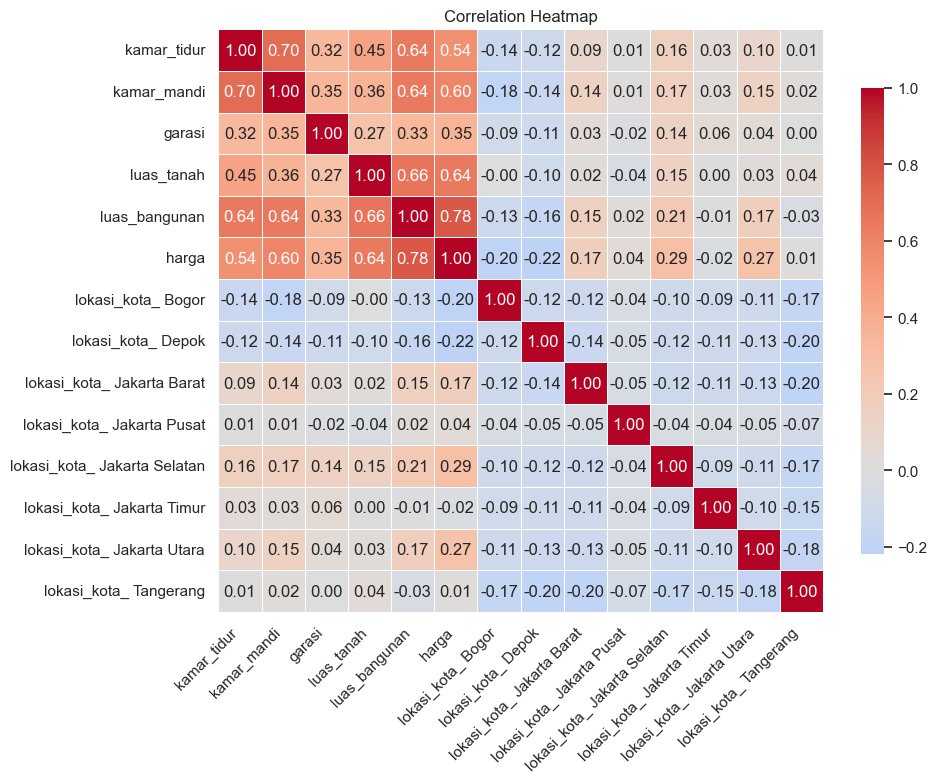

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df_reg

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Set plot size and style
plt.figure(figsize=(10, 8))
sns.set(style='whitegrid')

# Create heatmap with annotations
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [ ]:
from xgboost import XGBRegressor

# 6. Train regression model
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model.fit(X_train, y_train)

# 7. Predict and evaluate
y_pred = model.predict(X_test)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
gb_model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display
print(f"MAE  : {mae:,.0f}")
print(f"MSE  : {mse:,.0f}")
print(f"RMSE : {rmse:,.0f}")
print(f"R²   : {r2:.4f}")


MAE  : 484,797,142
MSE  : 521,840,242,857,846,848
RMSE : 722,385,107
R²   : 0.8079


- Feature importance

In [ ]:
df_reg.sample()

,kamar_tidur,kamar_mandi,garasi,luas_tanah,luas_bangunan,harga,lokasi_kota_ Bogor,lokasi_kota_ Depok,lokasi_kota_ Jakarta Barat,lokasi_kota_ Jakarta Pusat,lokasi_kota_ Jakarta Selatan,lokasi_kota_ Jakarta Timur,lokasi_kota_ Jakarta Utara,lokasi_kota_ Tangerang
5034,3,1,1,78.0,90.0,1.650000e+09,False,False,True,False,False,False,False,False


In [ ]:
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

importance_df


,Feature,Importance
4,luas_bangunan,0.317123
5,lokasi_kota_ Bogor,0.119249
11,lokasi_kota_ Jakarta Utara,0.100706
9,lokasi_kota_ Jakarta Selatan,0.099283
7,lokasi_kota_ Jakarta Barat,0.061916
6,lokasi_kota_ Depok,0.058391
12,lokasi_kota_ Tangerang,0.057070
1,kamar_mandi,0.050464
3,luas_tanah,0.038031
8,lokasi_kota_ Jakarta Pusat,0.036478


C:\Users\Ilham\AppData\Local\Temp\ipykernel_16732\4231522586.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')


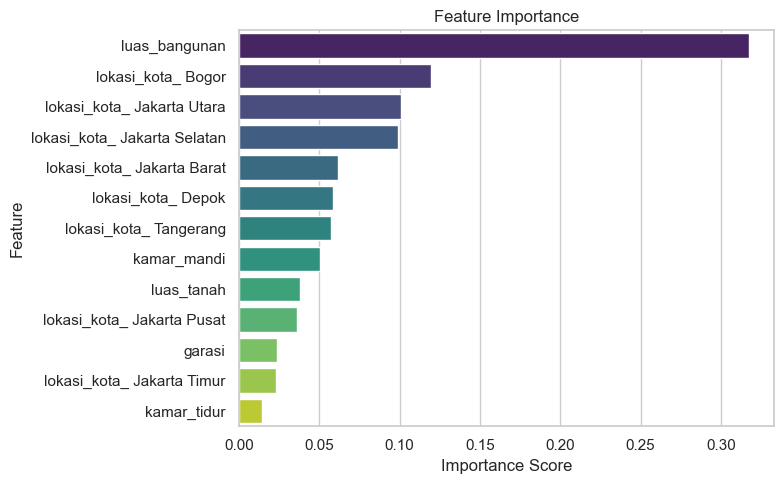

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
